In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from math import sqrt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
# plt.rcParams["figure.figsize"] = (100,50)

/Users/carooobregon/anaconda3/envs/computer-vision/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [2]:
# Importing dataset
df = pd.read_csv('data/avocado.csv')
df = df[["Total Volume","region", "Date"]]
# Parsing date
df['Date'] = pd.to_datetime(df['Date'])
# Filtering location to only LA
df = df.set_index("region")
df = df.loc[["LosAngeles"]]
df = df.reset_index()
df = df[["Total Volume", "Date"]]
df.head()

,Total Volume,Date
0,2326942.14,2015-12-27
1,2149872.45,2015-12-20
2,2690296.07,2015-12-13
3,3048290.53,2015-12-06
4,2156008.93,2015-11-29


In [3]:
# Renaming Column
for col in df.columns:
    print(col)
df = df.rename(columns={'Total Volume' : 'TotalVol'})
for col in df.columns:
    print(col)

Total Volume
Date
TotalVol
Date


In [4]:
# Removing data outliers
y = df['TotalVol']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
print(removed_outliers.value_counts())
index_names = df[~removed_outliers].index # INVERT removed_outliers!!
print(index_names)
df.drop(index_names, inplace=True)

True     304
False     34
Name: TotalVol, dtype: int64
Int64Index([ 28,  34,  47,  81,  85,  86,  97,  98, 103, 131, 132, 134, 138,
            151, 152, 153, 164, 179, 180, 181, 182, 185, 186, 188, 189, 190,
            192, 193, 208, 209, 210, 214, 217, 230],
           dtype='int64')


In [5]:
# Grouping data by year and Total Vol
df = df.groupby(df['Date'].dt.strftime('%Y-%m'))['TotalVol'].sum()

In [6]:
# Renaming df to series
series = df.to_frame()
series.head()

,TotalVol
Date,
2015-01,10684903.63
2015-02,8664245.45
2015-03,13718232.69
2015-04,10836845.74
2015-05,12385015.34


/Users/carooobregon/anaconda3/envs/computer-vision/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=10204078.421792, expected=15874760.920000
predicted=11838236.477819, expected=10197685.740000
predicted=11257268.075642, expected=3845157.880000
predicted=10385387.354660, expected=14801900.130000
predicted=13242141.225808, expected=10280737.840000
predicted=8746757.653077, expected=8045978.410000
predicted=10132423.042279, expected=10324922.030000
predicted=10785035.588312, expected=10119699.130000
predicted=9494734.348137, expected=14107347.920000
predicted=9695537.134225, expected=11067366.750000
predicted=9584558.664744, expected=9476641.130000
predicted=11738172.373230, expected=12437789.150000
Test RMSE: 3448344.647


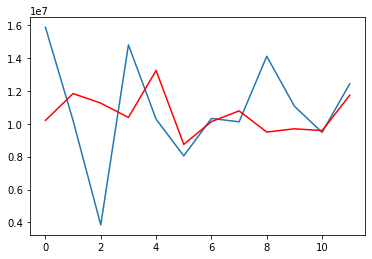

In [9]:
# Evaluating ARIMA and training model
X = series.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

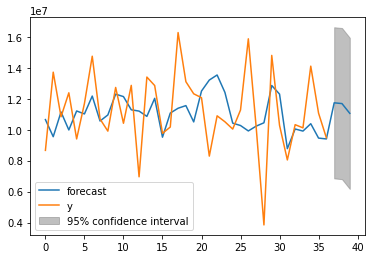

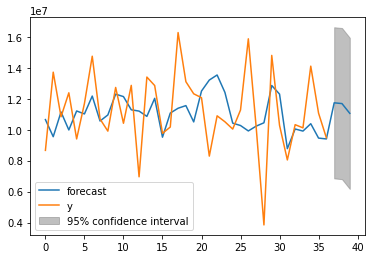

In [10]:
# Predicting
model_fit.plot_predict(1,40)